# 50 State of Dismay: The Effect of Abortions Rates on Foster Care Entries
## Correlation One DS4A/Women Capstone Project
### Led by Sasha Gryshchenko
### In collaboration with Priya Balaji, Cassie Berns, Chevaunne Edwards, Paula Wu, Ange Yang

In [ ]:
pip install plotly

In [ ]:
pip install shap

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.patches as mpatches
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import statsmodels.api as sm
import scipy.stats as stats
import category_encoders as ce
import xgboost as xgb

In [8]:
df = pd.read_csv("Capstone Project Data/merged_data.csv")
df.head()

,Unnamed: 0,state,year,adopted_under1,code,birthstotal,adoptions_per_1000,population_women,abortions,abortion_rate_1000,...,mothers_labor_force_rate,fathers_labor_force_rate,earning_ratio_women_to_men_uni_grads,births,ave_mother_age,ave_num_of_prenatal_visits,status,fostercare_rate_<1_per_1000,abortion_ban,political_ideology
0,0,California,2000,225.0,CA,531959,0.42,7578978,235706.2,31.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,5,Democrat
1,1,California,2005,161.0,CA,548882,0.34,7787065,206357.2,26.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,5,Democrat
2,2,California,2006,152.0,CA,562440,0.38,7799350,213702.2,27.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.3,5,Democrat
3,3,California,2007,177.0,CA,566414,0.23,7803744,220846.0,28.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.6,5,Democrat
4,4,California,2008,172.0,CA,551779,0.29,7828450,212151.0,27.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,5,Democrat


In [12]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df['year'] = df['year'].astype('float').astype('int').astype('str')

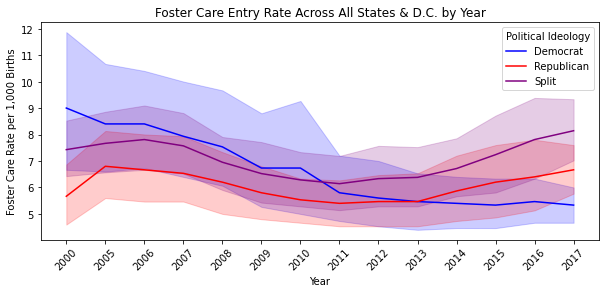

In [14]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df.sort_values(by=['year']),y='foster_care_rate_per_1000',x='year',hue='political_ideology',palette=['blue','red','purple'])
plt.xticks(rotation=45)
plt.title('Foster Care Entry Rate Across All States & D.C. by Year',)
plt.ylabel('Foster Care Rate per 1,000 Births')
plt.xlabel('Year')
plt.legend(title='Political Ideology')

Foster care entries were decreasing up until around 2011, after which the rates started climbing for Republican and Split states, but not Democrat states.

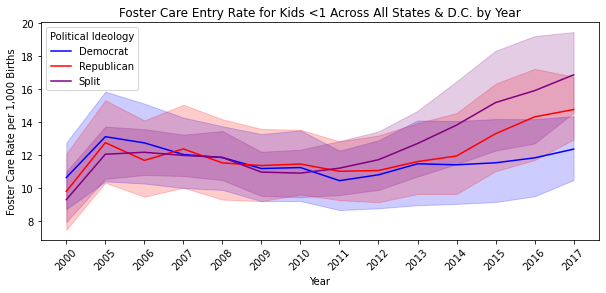

In [15]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df.sort_values(by=['year']),y='fostercare_rate_<1_per_1000',x='year',hue='political_ideology',palette=['blue','red','purple'])
plt.xticks(rotation=45)
plt.title('Foster Care Entry Rate for Kids <1 Across All States & D.C. by Year')
plt.ylabel('Foster Care Rate per 1,000 Births')
plt.xlabel('Year')
plt.legend(title='Political Ideology')

Similar is seen for foster care entries specifically for infants. The table below further proves this point.

In [36]:
round(df[['foster_care_rate_per_1000','political_ideology','year']].
      groupby(['year','political_ideology']).mean().tail(15),1)

foster_care_rate_per_1000
year political_ideology                           
2013 Democrat                                  5.5
     Republican                                5.5
     Split                                     6.4
2014 Democrat                                  5.4
     Republican                                5.9
     Split                                     6.7
2015 Democrat                                  5.3
     Republican                                6.2
     Split                                     7.2
2016 Democrat                                  5.5
     Republican                                6.4
     Split                                     7.8
2017 Democrat                                  5.3
     Republican                                6.7
     Split                                     8.1

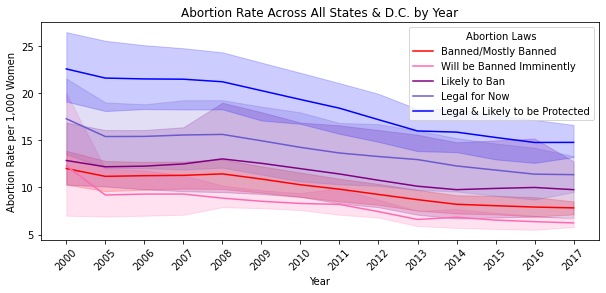

In [32]:
plt.figure(figsize=(10, 4))
palette = ['red','hotpink','purple','slateblue','blue']
sns.lineplot(data=df.sort_values(by=['year']),x='year',y='abortion_rate_1000',hue='abortion_ban',palette=palette)
plt.xticks(rotation=45)
plt.title('Abortion Rate Across All States & D.C. by Year')
plt.xlabel('Year')
plt.ylabel('Abortion Rate per 1,000 Women')
plt.legend(title='Abortion Laws',
           labels=['Banned/Mostly Banned','Will be Banned Imminently','Likely to Ban','Legal for Now','Legal & Likely to be Protected'])

Abortion rates have been declining in all states over time, but it is clear that the rates are lowest in states with restrictive laws. However, note that the rates reported are only for legal abortions - the rates of illegal abortions are not available, but it is known that "denying women access to legal abortion does not prevent them from having abortions, but just increases the likelihood that they will resort to an illegal abortion carried out under unsafe conditions" according to [Guttmacher](https://www.guttmacher.org/perspectives50/abortion-and-after-legalization#).

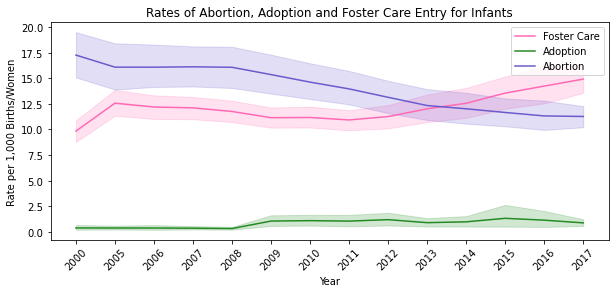

In [35]:
plt.figure(figsize=(10, 4))
ax = sns.lineplot(x="year",y="fostercare_rate_<1_per_1000", data=df.sort_values(by=['year']),color="hotpink") 
ax = sns.lineplot(x="year",y="adoptions_per_1000", data=df.sort_values(by=['year']),color="forestgreen")
ax = sns.lineplot(x="year",y="abortion_rate_1000", data=df.sort_values(by=['year']),color="slateblue")
plt.xticks(rotation=45)
plt.title('Rates of Abortion, Adoption and Foster Care Entry for Infants')
plt.xlabel('Year')
plt.ylabel('Rate per 1,000 Births/Women')
plt.legend(title='',
           labels=["Foster Care","Adoption","Abortion"])

It is seen that the rates of adoption are nowhere near the rates of foster care entry of infants across all years. It is, however, worth noting that, as we saw earlier, the rates of abortion are decreasing and the rates of foster care entries are decreasing, while the rates of adoption remained unaffected. 

Now let's shift focus to analyze how the states are different not only in the rates of aboriton, foster care entries, and adoptions, but socio-economically. Note that demographic information (e.g., age, race, ethnicity, etc.) is not considered in this project in a lot of detail, given the limited time allocated for copletion and limit individual-level data available.

In [52]:
fig = px.choropleth(df,
                    locations='code', 
                    locationmode='USA-states', 
                    scope='usa',
                    color='%women_to_men_full_time_earnings',
                    color_continuous_scale='Viridis_r',
                    hover_name='state',
                    labels={'Earnings Ratio':'% Earnings Ratio'})
fig.update_layout(
      title_text = 'Earnings Ratio - Women to Men (16+)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45)

In [47]:
fig = px.choropleth(df,
                    locations='code', 
                    locationmode='USA-states', 
                    scope='usa',
                    color='earning_ratio_women_to_men_uni_grads',
                    color_continuous_scale='Viridis_r',
                    hover_name='state',
                    labels={'Earnings Ratio':'% Earnings Ratio'})
fig.update_layout(
      title_text = 'Earnings Ratio - Women to Men (University Graduates, 25+)',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

In [60]:
print("The average income ratio of women to men across the US is",
      round(df['%women_to_men_full_time_earnings'].mean(),1),"%",
      "and the average income ratio of women to men with a university degree across the US is",
      round(df['earning_ratio_women_to_men_uni_grads'].mean(),1),"% .")

The average income ratio of women to men across the US is 78.1 % and the average income ratio of women to men with a university degree across the US is 73.8 % .


We see that there is huge discrepancy in the ratio between women's and men's incomes. It is also the case for women with university-level education. We also know that "More education leads to higher earnings but the gender pay gap is wider among men and women with a bachelor’s degree than among those without." according to [US Census Bureau](https://www.census.gov/library/stories/2019/05/college-degree-widens-gender-earnings-gap.html).

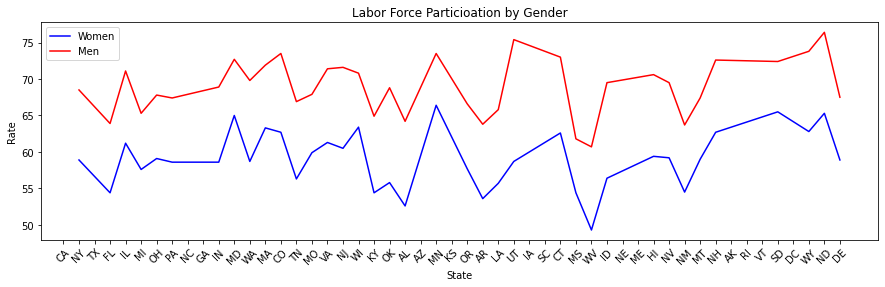

In [68]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df,x='code',y='%women_labor_force',color='b',label='Women')
sns.lineplot(data=df,x='code',y='%men_labor_force',color='r',label='Men')
plt.xticks(rotation=45)
plt.title('Labor Force Particioation by Gender')
plt.xlabel('State')
plt.ylabel('Rate')
plt.legend()

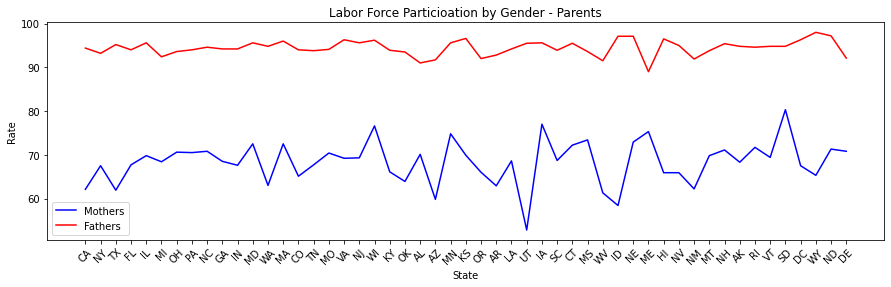

In [70]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=df,x='code',y='mothers_labor_force_rate',color='b',label='Mothers')
sns.lineplot(data=df,x='code',y='fathers_labor_force_rate',color='r',label='Fathers')
plt.xticks(rotation=45)
plt.title('Labor Force Particioation by Gender - Parents')
plt.xlabel('State')
plt.ylabel('Rate')
plt.legend()

We see that the labor force participation rates are very different for women vs men. The difference becomes even more noticable when considering the rates for parents: it is clear that fewer women enter the labor force when compared to men, since mothers are more likely to take on the primary caregiver role than the fathers. [Pew Research](https://www.pewresearch.org/social-trends/2015/11/04/raising-kids-and-running-a-household-how-working-parents-share-the-load/) found that "...in two-parent families, parenting and household responsibilities are shared more equally when both the mother and the father work full time than when the father is employed full time and the mother is employed part time or not employed. But even in households where both parents work full time, many say a large share of the day-to-day parenting responsibilities falls to mothers.", which further proves that there is still a fundamental difference between the two genders (not considering the cases of same sex marriages, gender neutral partners, etc.) when it comes to childcare, wlthough this is slowly shifting.

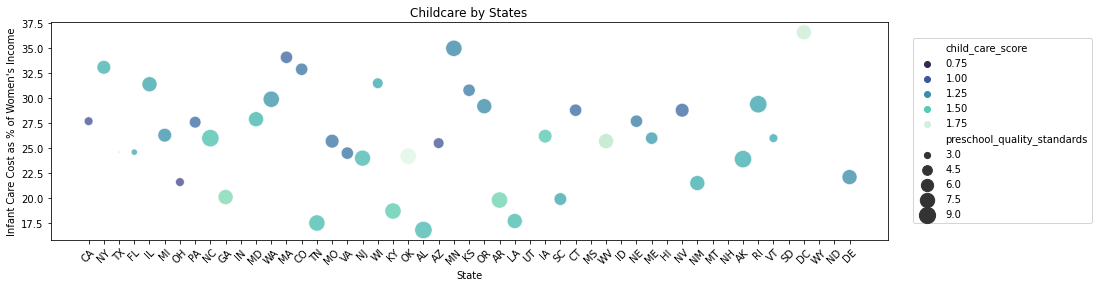

In [105]:
plt.figure(figsize=(15, 4))
sns.scatterplot(x="code", y="%infant_care_to_womens_income",
            data=df,palette='mako',size="preschool_quality_standards",
            hue="child_care_score",sizes=(1,300),alpha=0.75)
plt.xticks(rotation=45)
plt.title('Childcare by States')
plt.xlabel('State')
plt.ylabel("Infant Care Cost as % of Women's Income")
plt.legend(bbox_to_anchor=(1.25, 0.95))

From the plot above it is worth noting that states where the cost of childcare (in proportion to women's income) is low, the child care & preschool quality scores are high.

Now that we have a slightly better understanding of the socioeconomic background of different women by states, we can look more into the different political ideologies in each of the states & see how these relate to abortion restrictiveness.